In [2]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
%config InlineBackend.figure_format = 'retina'  # For high-resolution displays
%config InlineBackend.print_figure_kwargs = {'dpi': 200}  # Set DPI

In [23]:
sc.set_figure_params(vector_friendly=True, dpi_save=500)

In [19]:
sc.settings.figdir = '../../results/final_plot/'

In [5]:
adata = sc.read("../../processed_data/integrated_data/20241021_filtered_log_count.h5ad")

In [6]:
adata

AnnData object with n_obs × n_vars = 261929 × 36303
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'coarse_anno_1', 'total_counts', 'log10_total_counts', 'n_genes_detected', 'mito_frac', 'ribo_frac', 'compl', 'size_factors', 'Sample', 'Project', 'Core_datasets', 'Mandibular_Maxillary', 'Molar_Incisor', 'Tooth position', 'Histology', 'Sex', 'Gene Type', 'Knockout_gene', 'Cre', 'Treatment', 'FACs', 'Age', 'Stage', 'Development stage', 'Disease', 'Strain', 'Dissociation_enzyme', 'Machine', 'Species', 'Related assay', 'Journal', 'Data Source', 'Data location', 'new_totals_log', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'scDblFinder_class', 'leiden', 'leiden_clusters_0.001', 'leiden_clusters_0.005', 'leiden_clusters_0.01', 'leiden_clusters_0.05', 'leiden_clusters_0.1', 'leiden_clusters_0.175', 'leiden_clusters_0.25', 'leiden_clusters_0.

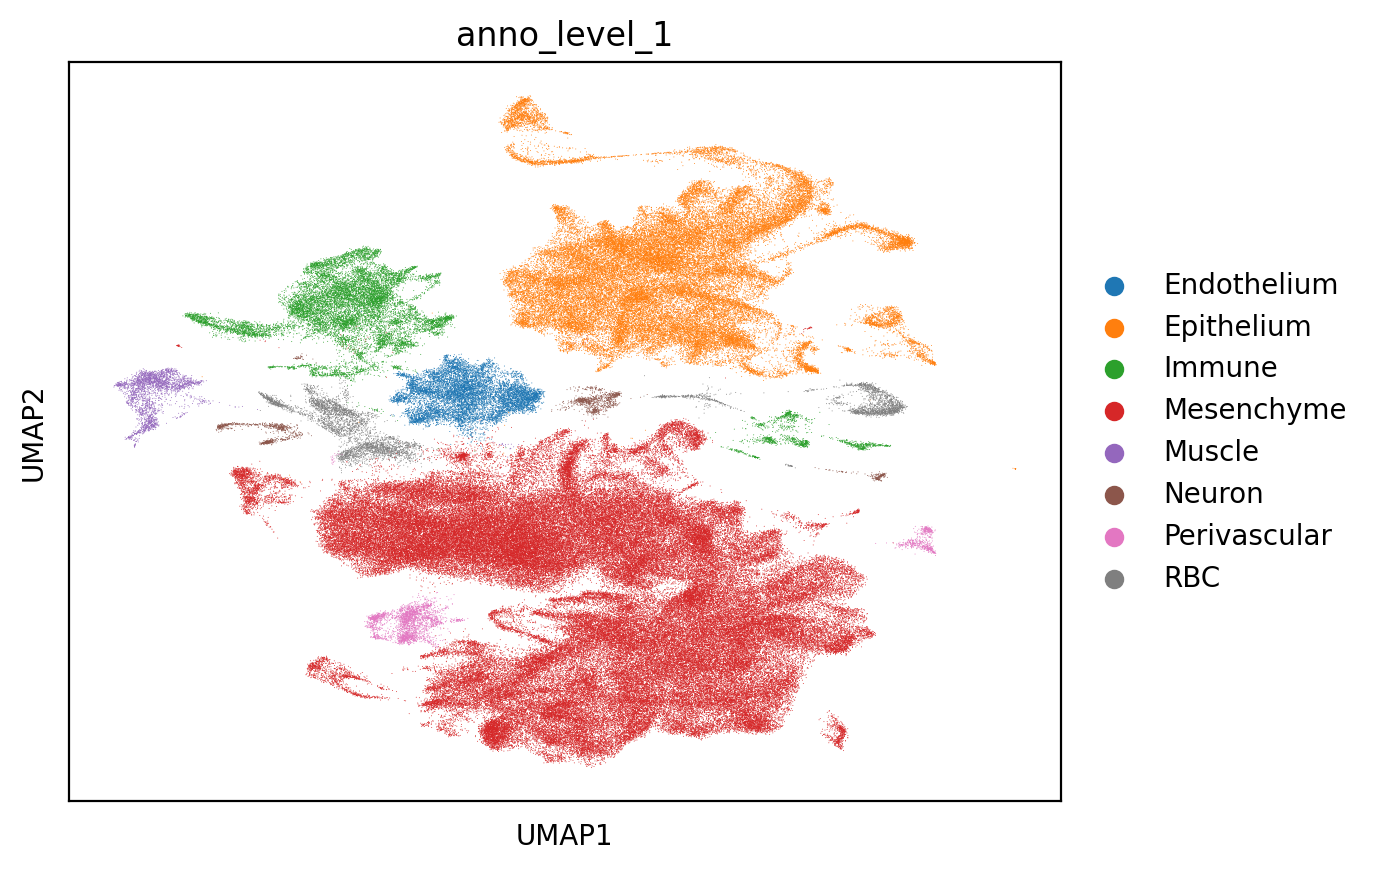

In [9]:
sc.pl.umap(adata,color="anno_level_1")

In [12]:
colors_dict = {
    'Endothelium': '#6A83A9',
    'Epithelium': '#DFE1BC',
    'Immune': '#E2E1E4',
    'Mesenchyme': '#90C6A7',
    'Muscle': '#795862',
    'Neuron': '#3D646A',
    'Perivascular': '#A49FB8',
    'RBC': '#141313'
}

In [16]:
adata = adata[adata.obs["anno_level_1"]!= "RBC"]

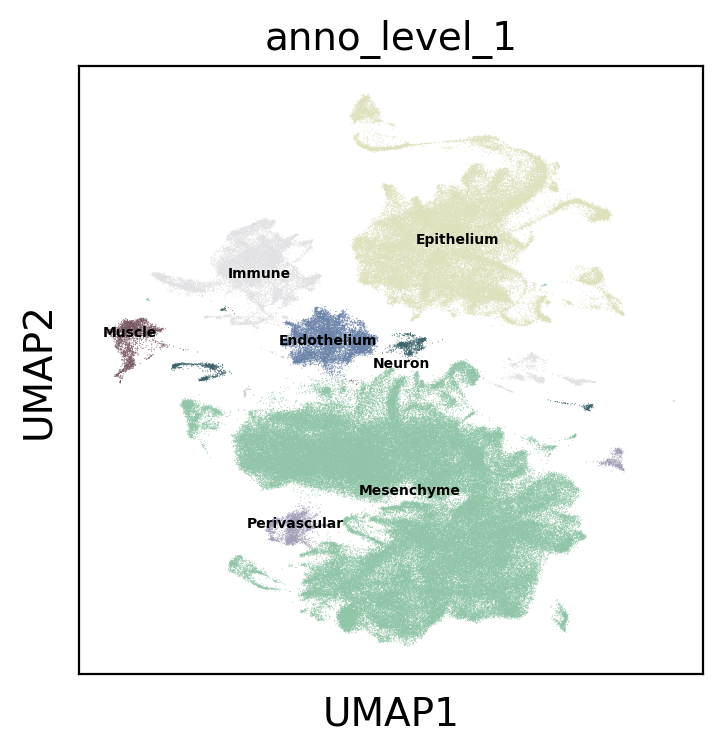

In [26]:
sc.pl.umap(adata,color="anno_level_1", palette=colors_dict, legend_loc = "on data",save="_level1_anno.pdf",legend_fontsize=5)

In [28]:
epiMeta = pd.read_csv("../../processed_data/framework/annotation/20250402_epi_meta.csv",index_col=0)
mesMeta = pd.read_csv("../../processed_data/framework/annotation/20250401_mes_meta.csv",index_col=0)

In [30]:
mesRed = pd.read_csv("../../processed_data/framework/embedding/20250402_mes_umap.csv",index_col=0)
epiRed = pd.read_csv("../../processed_data/framework/embedding/20250402_epi_umap.csv",index_col=0)

In [31]:
mesAdata = adata[mesRed.index]

In [33]:
epiAdata = adata[epiRed.index]

In [2]:
mes = sc.read("../../processed_data/integrated_data/20241118_mes.h5ad")

NameError: name 'sc' is not defined

In [36]:
mesAdata.obs = mesMeta
epiAdata.obs = epiMeta

In [39]:
mesAdata.obs.columns

Index(['orig.ident', 'nCount_originalexp', 'nFeature_originalexp',
       'nCount_RNA', 'nFeature_RNA', 'coarse_anno_1', 'total_counts',
       'log10_total_counts', 'n_genes_detected', 'mito_frac', 'ribo_frac',
       'compl', 'size_factors', 'Sample', 'Project', 'Core_datasets',
       'Mandibular_Maxillary', 'Molar_Incisor', 'Tooth.position', 'Histology',
       'Sex', 'Gene.Type', 'Knockout_gene', 'Cre', 'Treatment', 'FACs', 'Age',
       'Stage', 'Development.stage', 'Disease', 'Strain',
       'Dissociation_enzyme', 'Machine', 'Species', 'Related.assay', 'Journal',
       'Data.Source', 'Data.location', 'new_totals_log', 'n_genes_by_counts',
       'log1p_n_genes_by_counts', 'log1p_total_counts',
       'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes',
       'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes',
       'scDblFinder_class', 'leiden', 'anno_level_1', 'Cell_ID',
       'leiden_clusters_level_1', 'leiden_clusters_level_2',
       'leiden_clusters_l

NameError: name 'mesAdata' is not defined

In [44]:
 np.array(mesRed)

array([[ 5.7013526 ,  0.44891566],
       [ 2.5183363 ,  2.17693949],
       [ 5.65466452,  0.76591885],
       ...,
       [-1.29951417,  0.95080411],
       [-0.90290809, -0.44376373],
       [ 0.04835082, -0.51706994]])

In [45]:
mesAdata.obsm["X_umap_mes"] = np.array(mesRed)

In [46]:
epiAdata.obsm["X_umap_epi"] = np.array(epiRed)

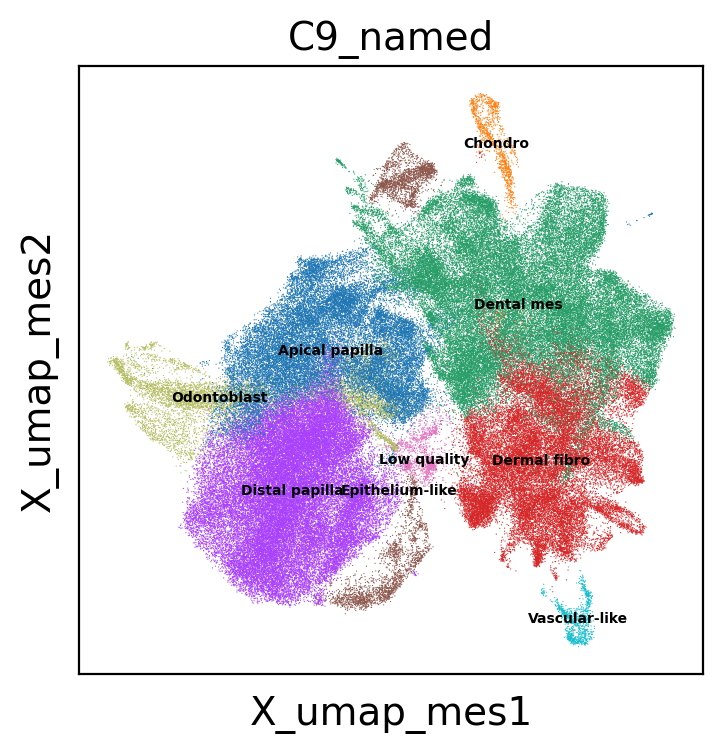

In [47]:
sc.pl.embedding(mesAdata,color="C9_named",  legend_loc = "on data",legend_fontsize=5,basis="X_umap_mes")

In [52]:
mesAdata = mesAdata[~mesAdata.obs["C9_named"].isin(["Low quality", "Vascular-like","Epithelium-like","Chondro"])]

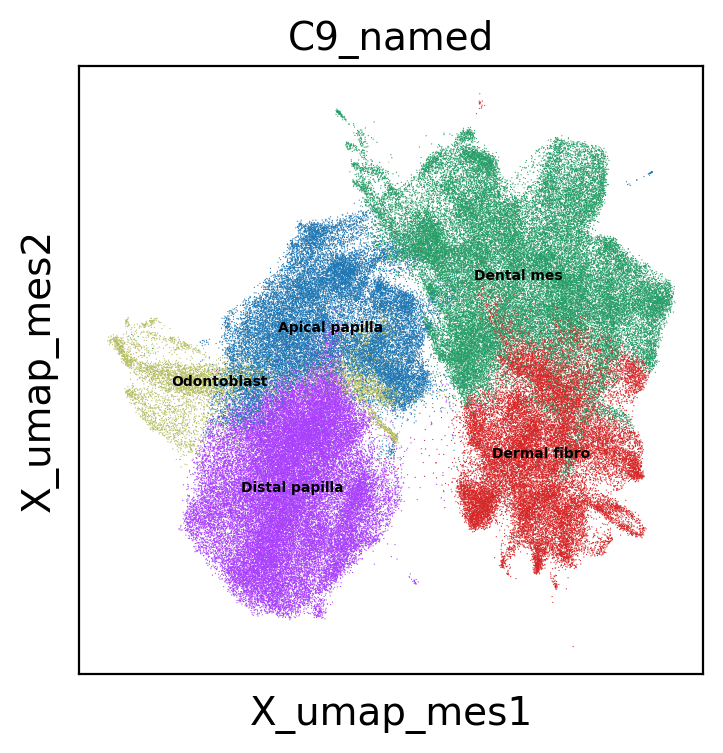

In [53]:
sc.pl.embedding(mesAdata,color="C9_named",  legend_loc = "on data",legend_fontsize=5,basis="X_umap_mes")

In [55]:
mesAdata.obs["C9_named"]

ToothNc_Junjun_AAACCCAAGCTAAGTA-1_1       Dermal fibro
ToothNc_Junjun_AAACCCACATCTATCT-1_1       Dermal fibro
ToothNc_Junjun_AAACCCAGTAGAATGT-1_1       Dermal fibro
ToothNc_Junjun_AAACCCAGTTCTCTCG-1_1       Dermal fibro
ToothNc_Junjun_AAACCCATCACAAGGG-1_1       Dermal fibro
                                             ...      
MolarP12_Tomoko_TTTGATCCACTCAGAT-1_1    Distal papilla
MolarP12_Tomoko_TTTGGAGAGACAGTCG-1_1    Distal papilla
MolarP12_Tomoko_TTTGTTGAGAAGCTGC-1_1    Distal papilla
MolarP12_Tomoko_TTTGTTGTCCCACAGG-1_1    Distal papilla
MolarP12_Tomoko_TTTGTTGTCGGTCGAC-1_1    Distal papilla
Name: C9_named, Length: 158646, dtype: category
Categories (5, object): ['Apical papilla', 'Dental mes', 'Dermal fibro', 'Distal papilla', 'Odontoblast']

In [58]:
colors_dict2 = {
    'Apical papilla': '#F2C9D5',
    'Dental mes': '#B43E44',
    'Dermal fibro': '#FADF92',
    'Distal papilla': '#496496',
    'Odontoblast': '#904869'
}

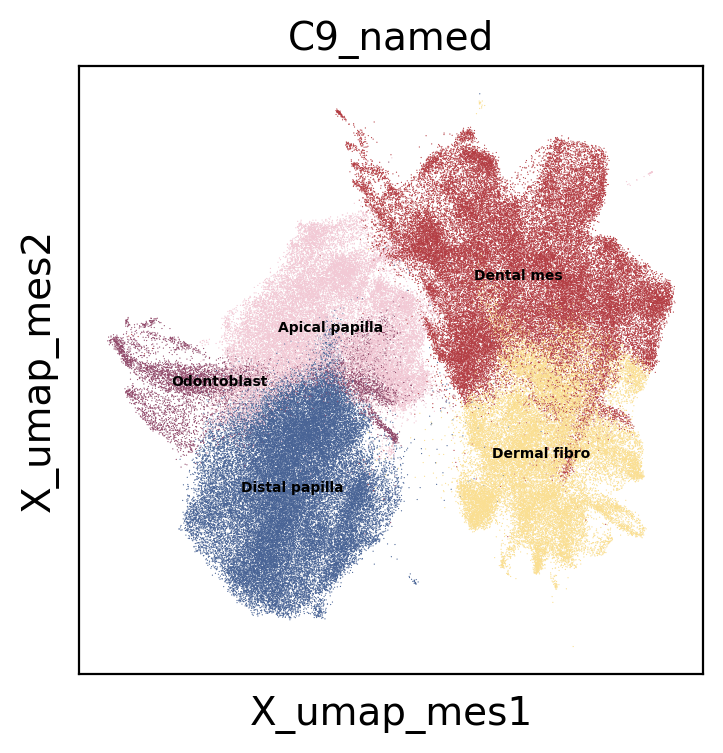

In [60]:
sc.pl.embedding(mesAdata,color="C9_named",  legend_loc = "on data", palette=colors_dict2,legend_fontsize=5,
                basis="X_umap_mes",save="_level1_mes.pdf")

In [61]:
epiAdata

AnnData object with n_obs × n_vars = 55673 × 36303
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'nCount_RNA', 'nFeature_RNA', 'coarse_anno_1', 'total_counts', 'log10_total_counts', 'n_genes_detected', 'mito_frac', 'ribo_frac', 'compl', 'size_factors', 'Sample', 'Project', 'Core_datasets', 'Mandibular_Maxillary', 'Molar_Incisor', 'Tooth.position', 'Histology', 'Sex', 'Gene.Type', 'Knockout_gene', 'Cre', 'Treatment', 'FACs', 'Age', 'Stage', 'Development.stage', 'Disease', 'Strain', 'Dissociation_enzyme', 'Machine', 'Species', 'Related.assay', 'Journal', 'Data.Source', 'Data.location', 'new_totals_log', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'scDblFinder_class', 'leiden', 'anno_level_1', 'Cell_ID', 'index', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'leiden_clusters_level_3', 'leiden_clusters_level_4', 

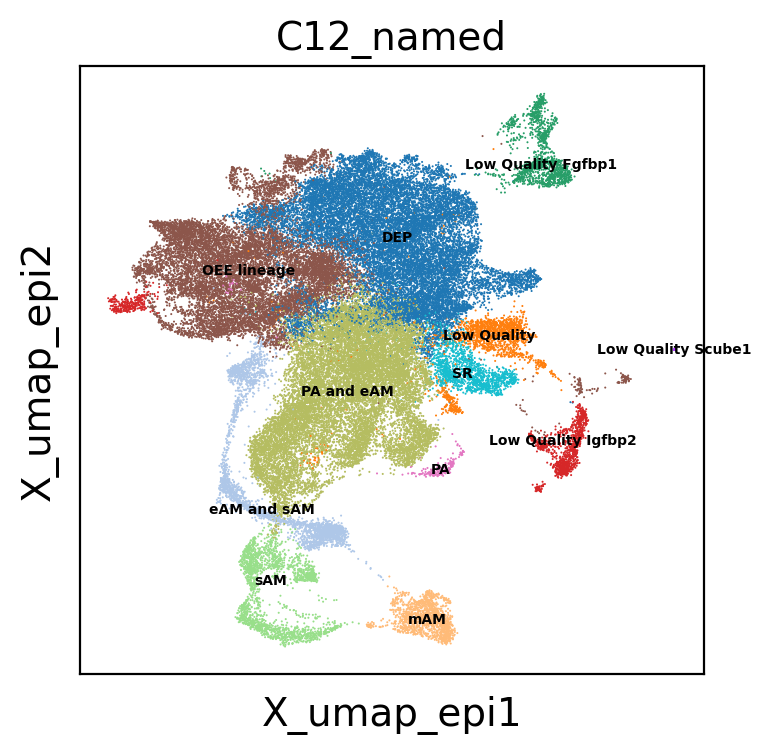

In [62]:
sc.pl.embedding(epiAdata,color="C12_named",  legend_loc = "on data",legend_fontsize=5,basis="X_umap_epi")

In [64]:
set(epiAdata.obs["C12_named"])

{'DEP',
 'Low Quality',
 'Low Quality Fgfbp1',
 'Low Quality Igfbp2',
 'Low Quality Scube1',
 'OEE lineage',
 'PA',
 'PA and eAM',
 'SR',
 'eAM and sAM',
 'mAM',
 'sAM'}

In [65]:
epiAdata = epiAdata[~epiAdata.obs["C12_named"].isin(['Low Quality',
 'Low Quality Fgfbp1',
 'Low Quality Igfbp2',
 'Low Quality Scube1',])]

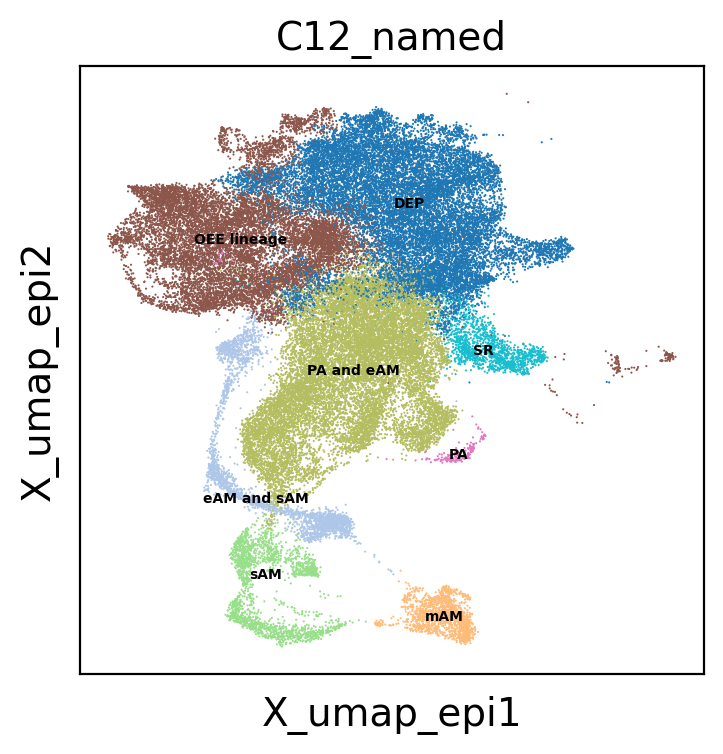

In [68]:
sc.pl.embedding(epiAdata,color="C12_named",  legend_loc = "on data",legend_fontsize=5,
                basis="X_umap_epi",save="_level1_epi.pdf")

In [69]:
set(epiAdata.obs["C12_named"])

{'DEP', 'OEE lineage', 'PA', 'PA and eAM', 'SR', 'eAM and sAM', 'mAM', 'sAM'}

In [72]:
colors_dict3 = {
    'DEP': '#E6E2F1',
    'OEE lineage': '#F8E8E3',
    'PA': '#F6D481',
    'PA and eAM': '#F5A556',
    'SR': '#FB9FB9',
    'eAM and sAM': '#C94D6C',
    'mAM': '#4F4E46',
    'sAM': "#A4AD72"
}

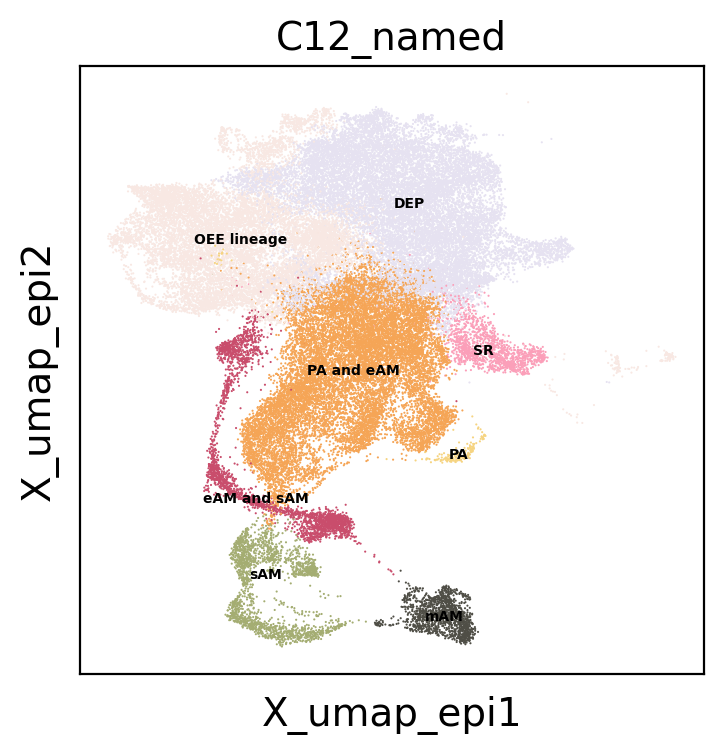

In [73]:
sc.pl.embedding(epiAdata,color="C12_named",  palette= colors_dict3,legend_loc = "on data",legend_fontsize=5,
                basis="X_umap_epi",save="_level1_epi.pdf")